# Visualizing the SpaceX Tesla Roadster trip to Mars

In [1]:
from astropy.time import Time

from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import *
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter, plot

EPOCH = Time("2018-02-18 12:00:00", scale="tdb")

In [2]:
from astroquery.jplhorizons import conf
conf.horizons_server = 'https://ssd.jpl.nasa.gov/horizons_batch.cgi'

from astroquery.jplhorizons import Horizons

from astropy.coordinates import ICRS, CartesianRepresentation, CartesianDifferential
from poliastro.frames import Planes

def get_roadster_orbit(epoch):
    roadster = Horizons(
        id="SpaceX Roadster", location="500@10", epochs=[epoch.jd], id_type="majorbody"
    ).elements()

    # Create Orbit object to do conversions
    roadster_eclip = Orbit.from_classical(
        Sun,
        roadster['a'][0] * u.au,
        roadster['e'][0] * u.one,
        roadster['incl'][0] * u.deg,
        roadster['Omega'][0] * u.deg,
        roadster['w'][0] * u.deg,
        roadster['nu'][0] * u.deg,
        epoch,
        plane=Planes.EARTH_ECLIPTIC
    )

    # Create final orbit
    roadster_icrs = roadster_eclip.to_icrs()

    return roadster_icrs

In [3]:
roadster = get_roadster_orbit(EPOCH)
roadster

1 x 2 AU x 24.2 deg (ICRS) orbit around Sun (☉) at epoch 2018-02-18 12:00:00.000 (TDB)

In [4]:
from poliastro.plotting import plot_solar_system

/home/juanlu/Development/poliastro/poliastro-library/src/poliastro/twobody/orbit.py:502: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



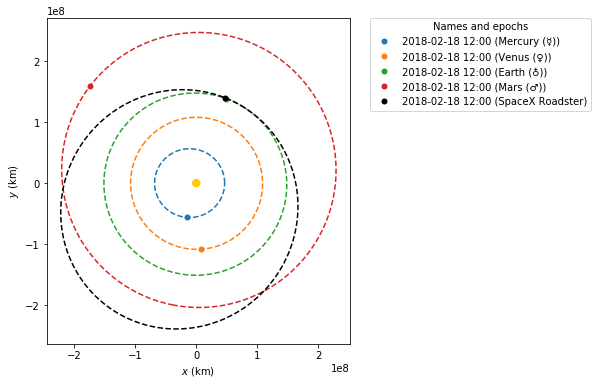

In [5]:
frame = plot_solar_system(outer=False, epoch=EPOCH)
frame.plot(roadster, label="SpaceX Roadster", color='k');

In [6]:
from poliastro.plotting import OrbitPlotter3D

from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

In [7]:
frame = OrbitPlotter3D()

frame.plot(Orbit.from_body_ephem(Earth, EPOCH), label=Earth)
frame.plot(Orbit.from_body_ephem(Mars, EPOCH), label=Mars)
frame.plot(roadster, label="SpaceX Roadster", color='black')

frame.set_view(30 * u.deg, -100 * u.deg, 2 * u.km)
frame.show()